In [139]:

import phoenixdb

"""
Get connection 
"""
def get_conn(host):
    database_url = 'http://' + host + ':8765/'
    conn = phoenixdb.connect(database_url, autocommit=True)
    return conn


In [140]:
def execute_sql(sql_str):
    cursor.execute(sql_str)
    results = cursor.fetchall()
    return results
    

In [141]:
host = "localhost"
conn = get_conn(host)
cursor = conn.cursor()


psm_table = "T_PROJECT_ANALYSIS_RECORD"
sql_str = "SELECT * FROM " + psm_table+ " "
results = execute_sql(sql_str)

project_infos = dict()
for r in results:
    project_info = dict()
    project_id = r[0]
    project_info = {
        'project_id':r[0],
        'cluster_size_threshold' : r[1],
        'cluster_ratio_threshold' : r[2],
        'conf_sc_threshold' : r[3],
        'spectrast_fval_threshold' : r[4],
        'prepsm_no' : r[5],
        'prepsm_not_matched_no' : r[6],
        'prepsm_high_conf_no' : r[7],
        'prepsm_low_conf_no' : r[8],
        'better_psm_no' : r[9],
        'new_psm_no' : r[10],
        'matched_spec_no' : r[11],
        'matched_id_spec_no' : r[12]
    }
    project_infos[project_id] = project_info

print(project_infos)

{'PXD000222': {'conf_sc_threshold': 0.10000000149011612, 'cluster_ratio_threshold': 0.5, 'prepsm_not_matched_no': 214150, 'prepsm_high_conf_no': 213346, 'cluster_size_threshold': 10, 'project_id': 'PXD000222', 'prepsm_low_conf_no': 3804, 'new_psm_no': 65411, 'prepsm_no': 433401, 'matched_spec_no': 287350, 'better_psm_no': 3804, 'spectrast_fval_threshold': 0.5, 'matched_id_spec_no': 219251}, 'PXD002057': {'conf_sc_threshold': 0.10000000149011612, 'cluster_ratio_threshold': 0.5, 'prepsm_not_matched_no': 5919, 'prepsm_high_conf_no': 2486, 'cluster_size_threshold': 10, 'project_id': 'PXD002057', 'prepsm_low_conf_no': 15, 'new_psm_no': 2650, 'prepsm_no': 8523, 'matched_spec_no': 5677, 'better_psm_no': 15, 'spectrast_fval_threshold': 0.5, 'matched_id_spec_no': 2604}, 'PXD000119': {'conf_sc_threshold': 0.10000000149011612, 'cluster_ratio_threshold': 0.5, 'prepsm_not_matched_no': 1284, 'prepsm_high_conf_no': 16, 'cluster_size_threshold': 10, 'project_id': 'PXD000119', 'prepsm_low_conf_no': 1, 

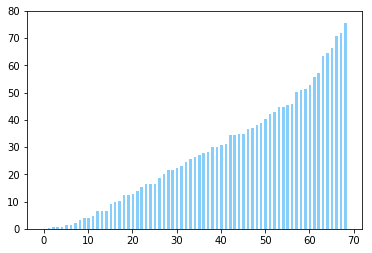

In [142]:
#matched identified spectrum  in previous psm
projects = list()
rates1 = list()
for project_id in project_infos.keys():
    project_info = project_infos.get(project_id)
    rate = 100 * project_info.get('matched_id_spec_no')/project_info.get('prepsm_no')
    projects.append(str(project_id))
    rates1.append(rate)
    
from matplotlib import pyplot as plt
import numpy as np

length = len(rates1)
index = np.arange(length)

rates1.sort()

plt.bar(index, rates1, width = 0.8,facecolor = 'lightskyblue',edgecolor = 'white')
plt.show()


#matched identified spectrum  in previous psm (percentage)

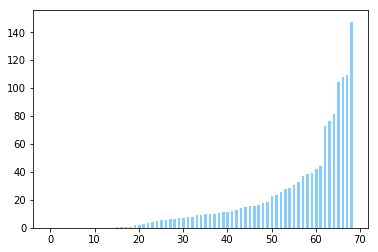

In [143]:
#new identified spectrum  in previous psm (percentage)
X = list()
Y = list()
for project_id in project_infos.keys():
    project_info = project_infos.get(project_id)
    rate = 100 * project_info.get('new_psm_no')/project_info.get('prepsm_no')
    X.append(str(project_id))
    Y.append(rate)
    
length = len(Y)
index = np.arange(length)

Y.sort()

plt.bar(index, Y,width = 0.8,facecolor = 'lightskyblue',edgecolor = 'white')
plt.show()


project PXD003709 has more 100% new identified psm than pre identified psm, 1968/1790 = 109.944134
project PXD000176 has more 100% new identified psm than pre identified psm, 18206/12285 = 148.196988
project PXD001118 has more 100% new identified psm than pre identified psm, 33442/31816 = 105.110636
project PXD000363 has more 100% new identified psm than pre identified psm, 11536/10635 = 108.472026


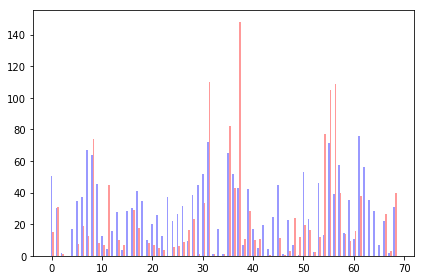

In [162]:
#new identified spectrum  than previous psm
projects = list()
rates1 = list()
rates2 = list()
for project_id in project_infos.keys():
    project_info = project_infos.get(project_id)
    rate1 = 100 * project_info.get('matched_id_spec_no')/project_info.get('prepsm_no')
    rate2 = 100 * project_info.get('new_psm_no')/project_info.get('prepsm_no')
    projects.append(str(project_id))
    rates1.append(rate1)
    rates2.append(rate2)
    
    if rate2 >= 100:
        print("project %s has more 100%% new identified psm than pre identified psm, %d/%d = %f"%
              (project_id, project_info.get('new_psm_no'),project_info.get('prepsm_no'), rate2))
    
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}


length = len(rates1)
index = np.arange(length)

rects1 = ax.bar(index, rates1, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='matched_pre_id_psm')

rects2 = ax.bar(index + bar_width, rates2, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='mew_id_psm')


fig.tight_layout()
plt.show()

#plt.bar(index, rates1, width = 0.8,facecolor = 'blue',edgecolor = 'white')
#plt.bar(index, rates2, width = 0.5,facecolor = 'red',edgecolor = 'white')
#plt.show()

#new identified spectrum  than previous psm (percentage)

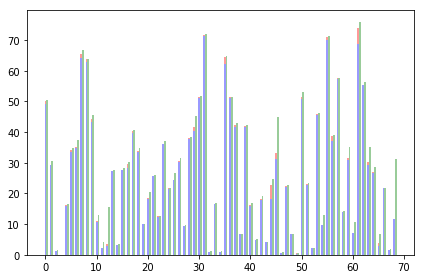

In [168]:
#low score identified spectrum
projects = []
rates1 = []
rates2 = []
rates3 = []
for project_id in project_infos.keys():
    project_info = project_infos.get(project_id)
    rate1 = 100 * project_info.get('prepsm_high_conf_no')/project_info.get('prepsm_no')
    rate2 = 100 * project_info.get('prepsm_low_conf_no')/project_info.get('prepsm_no')
    rate3 = 100 * project_info.get('matched_id_spec_no')/project_info.get('prepsm_no')
    #print("%s: %s--%s"%(project_id,rate1,rate2))
    if rate3 < rate1 + rate2:
        print("%s: %s < %s + %s"%(project_id,rate3,rate1,rate2)) 
        print("%s: %s < %s + %s"%(project_id,project_info.get('matched_id_spec_no'),project_info.get('prepsm_low_conf_no'),project_info.get('prepsm_high_conf_no')))
    projects.append(str(project_id))
    rates1.append(rate1)
    rates2.append(rate2)
    rates3.append(rate3)
    
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}


length = len(rates1)
index = np.arange(length)

rects1 = ax.bar(index, rates1, bar_width,
                alpha=opacity, color='b',
                error_kw=error_config,
                label='prepsm_high_conf_no')

rects2 = ax.bar(index, rates2, bar_width,
                 bottom=rates1,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='prepsm_high_conf_no')

rects3 = ax.bar(index + bar_width, rates3, bar_width,
#                 bottom=rates2,
                alpha=opacity, color='g',
                error_kw=error_config,
                label='prepsm_high_conf_no')

fig.tight_layout()
plt.show()

#plt.bar(index, rates1, width = 0.8,facecolor = 'blue',edgecolor = 'white')
#plt.bar(index, rates2, width = 0.5,facecolor = 'red',edgecolor = 'white')
#plt.show()

#new identified spectrum  than previous psm (percentage)

In [169]:
#low many new identified, high_conf_score, low_conf_score psms in all projects? abs no and relative no.
"""
    project_info = {
        'project_id':r[0],
        'cluster_size_threshold' : r[1],
        'cluster_ratio_threshold' : r[2],
        'conf_sc_threshold' : r[3],
        'spectrast_fval_threshold' : r[4],
        'prepsm_no' : r[5],
        'prepsm_not_matched_no' : r[6],
        'prepsm_high_conf_no' : r[7],
        'prepsm_low_conf_no' : r[8],
        'better_psm_no' : r[9],
        'new_psm_no' : r[10],
        'matched_spec_no' : r[11],
        'matched_id_spec_no' : r[12]
    }
"""


total_prepsm_no = 0
total_new_psm_no = 0
total_prepsm_high_conf_no = 0
total_prepsm_low_conf_no = 0
total_matched_id_spec_no = 0


for project_id in project_infos.keys():
    project_info = project_infos.get(project_id)
    #print(project_info.get('prepsm_no'))
    total_prepsm_no += project_info.get('prepsm_no')
    total_new_psm_no += project_info.get('new_psm_no')
    total_prepsm_high_conf_no += project_info.get('prepsm_high_conf_no')
    total_prepsm_low_conf_no += project_info.get('prepsm_low_conf_no')
    total_matched_id_spec_no += project_info.get('matched_id_spec_no')
print("total pre psm no %d"%(total_prepsm_no))
print("total new psm no %d, %f%% relative to total pre psm"%(total_new_psm_no, 100*total_new_psm_no/total_prepsm_no))
print("total pre psm mathced no %d, %f%% relative to total pre psm"%(total_matched_id_spec_no, 100*total_matched_id_spec_no/total_prepsm_no))
print("total pre psm high_conf no %d, %f%% relative to total pre psm"%(total_prepsm_high_conf_no, 100*total_prepsm_high_conf_no/total_prepsm_no))
print("total pre psm low_conf no %d, %f%% relative to total pre psm"%(total_prepsm_low_conf_no, 100*total_prepsm_low_conf_no/total_prepsm_no))
    

total pre psm no 6768723
total new psm no 836828, 12.363159% relative to total pre psm
total pre psm mathced no 2277313, 33.644648% relative to total pre psm
total pre psm high_conf no 2117729, 31.286980% relative to total pre psm
total pre psm low_conf no 33066, 0.488512% relative to total pre psm
